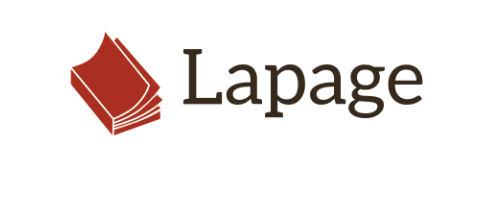

# <font color=B42633> **Analysez les ventes d'une librairie avec R ou Python**
________________________________________________________________________________________
________________________________________________________________________________________

## <font color=B42633>**Préparation de données**
_____________________________________

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# importer les bibliothèques 
import pandas as pd
import numpy as np 

# lire les fichiers dans un dataframe pandas 
client = pd.read_csv('/content/drive/MyDrive/Cours/OPEN CLASSROOM/P6_Ehouman_Yann/DAN-P6-donnees/customers.csv')
produit = pd.read_csv('/content/drive/MyDrive/Cours/OPEN CLASSROOM/P6_Ehouman_Yann/DAN-P6-donnees/products.csv')
transaction = pd.read_csv('/content/drive/MyDrive/Cours/OPEN CLASSROOM/P6_Ehouman_Yann/DAN-P6-donnees/transactions.csv')

In [3]:
#Description du dataframe transaction
transaction.describe()

,id_prod,date,session_id,client_id
count,679532,679532,679532,679532
unique,3267,679371,342316,8602
top,1_369,test_2021-03-01 02:30:02.237413,s_0,c_1609
freq,2252,13,200,25488


In [6]:
transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 679532 entries, 0 to 679531
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   id_prod     679532 non-null  object
 1   date        679532 non-null  object
 2   session_id  679532 non-null  object
 3   client_id   679532 non-null  object
dtypes: object(4)
memory usage: 20.7+ MB


In [4]:
#Y'a-t-il des valeurs nulles ? 
transaction.isnull().sum()

id_prod       0
date          0
session_id    0
client_id     0
dtype: int64

In [9]:
transaction_ok = transaction[transaction['date'].str.len() == 26]
transaction_ok

,id_prod,date,session_id,client_id
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232
...,...,...,...,...
679527,0_1551,2022-01-15 13:05:06.246925,s_150195,c_8489
679528,1_639,2022-03-19 16:03:23.429229,s_181434,c_4370
679529,0_1425,2022-12-20 04:33:37.584749,s_314704,c_304
679530,0_1994,2021-07-16 20:36:35.350579,s_63204,c_2227


In [10]:
# Pour la colonne, 'price' où sont les valeurs abérantes ?
print(np.where(produit['price']<0))

(array([731]),)


In [11]:
produit_ok = produit[produit['price'] >= 0]

In [13]:
produit_ok.head()

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0


In [14]:
Liste_Produit_ok = transaction_ok['id_prod'].isin(produit_ok['id_prod'])
Liste_Produit_ok.describe()

count     679332
unique         2
top         True
freq      679111
Name: id_prod, dtype: object

In [15]:
Liste_Produit_ok.value_counts()

True     679111
False       221
Name: id_prod, dtype: int64

In [16]:
import datetime
transaction_ok['date'] = pd.to_datetime(transaction_ok['date'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [17]:
transaction_ok.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 679332 entries, 0 to 679531
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   id_prod     679332 non-null  object        
 1   date        679332 non-null  datetime64[ns]
 2   session_id  679332 non-null  object        
 3   client_id   679332 non-null  object        
dtypes: datetime64[ns](1), object(3)
memory usage: 25.9+ MB


In [18]:
transaction_ok["Calendrier"] = transaction_ok['date'].apply(lambda x: pd.Timestamp(x).strftime('%Y/%m/%d'))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [20]:
transaction_ok.head()

,id_prod,date,session_id,client_id,Calendrier
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,2022/05/20
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534,2022/02/02
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714,2022/06/18
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941,2021/06/24
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232,2023/01/11


In [21]:
transaction_ok['annee / mois'] = transaction_ok['date'].apply(lambda x: pd.Timestamp(x).strftime('%Y/%m'))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [22]:
transaction_ok.head()

,id_prod,date,session_id,client_id,Calendrier,annee / mois
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,2022/05/20,2022/05
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534,2022/02/02,2022/02
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714,2022/06/18,2022/06
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941,2021/06/24,2021/06
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232,2023/01/11,2023/01


In [23]:
transaction_ok['heure2'] = transaction_ok['date'].apply(lambda x: pd.Timestamp(x).strftime('%Y/%m/%d %H:%M:%S'))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [25]:
transaction_ok.head()

,id_prod,date,session_id,client_id,Calendrier,annee / mois,heure2
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,2022/05/20,2022/05,2022/05/20 13:21:29
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534,2022/02/02,2022/02,2022/02/02 07:55:19
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714,2022/06/18,2022/06,2022/06/18 15:44:33
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941,2021/06/24,2021/06,2021/06/24 04:19:29
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232,2023/01/11,2023/01,2023/01/11 08:22:08


In [26]:
produit.head()

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0


In [27]:
transaction_ok.groupby(pd.Grouper(key='date',freq="3M")).count().reset_index()

,date,id_prod,session_id,client_id,Calendrier,annee / mois,heure2
0,2021-03-31,28610,28610,28610,28610,28610,28610
1,2021-06-30,83607,83607,83607,83607,83607,83607
2,2021-09-30,83727,83727,83727,83727,83727,83727
3,2021-12-31,82391,82391,82391,82391,82391,82391
4,2022-03-31,88660,88660,88660,88660,88660,88660
5,2022-06-30,86118,86118,86118,86118,86118,86118
6,2022-09-30,85549,85549,85549,85549,85549,85549
7,2022-12-31,86173,86173,86173,86173,86173,86173
8,2023-03-31,54497,54497,54497,54497,54497,54497


In [28]:
transaction_produit = pd.merge(transaction_ok, produit_ok, on='id_prod')

In [29]:
transaction_produit.head(3)

,id_prod,date,session_id,client_id,Calendrier,annee / mois,heure2,price,categ
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,2022/05/20,2022/05,2022/05/20 13:21:29,4.18,0
1,0_1518,2021-09-26 12:37:29.780414,s_95811,c_6197,2021/09/26,2021/09,2021/09/26 12:37:29,4.18,0
2,0_1518,2021-05-06 17:14:43.117440,s_30782,c_682,2021/05/06,2021/05,2021/05/06 17:14:43,4.18,0


In [31]:
dataframe_transaction_produit = transaction_produit.groupby(pd.Grouper(key='date',freq="M")).count().reset_index()
dataframe_transaction_produit.head()

,date,id_prod,session_id,client_id,Calendrier,annee / mois,heure2,price,categ
0,2021-03-31,28601,28601,28601,28601,28601,28601,28601,28601
1,2021-04-30,28443,28443,28443,28443,28443,28443,28443,28443
2,2021-05-31,28285,28285,28285,28285,28285,28285,28285,28285
3,2021-06-30,26850,26850,26850,26850,26850,26850,26850,26850
4,2021-07-31,24738,24738,24738,24738,24738,24738,24738,24738


## <font color=B42633> **Le chiffre d'affaire**

In [32]:
dataframe_transaction_produit2 = transaction_produit.groupby(pd.Grouper(key='date',freq="M")).sum().reset_index()
chiffre_daffaire = dataframe_transaction_produit2


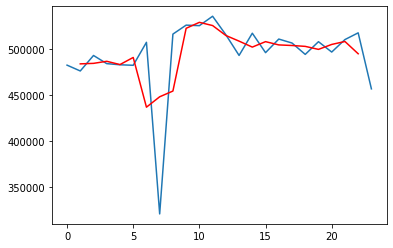

In [33]:
#avoir le CA par mois ! 
import matplotlib.pyplot as plt

plt.plot(chiffre_daffaire["price"])
moyenne_mobile = chiffre_daffaire.rolling(window = 3,center=True).mean().round(2)
plt.plot(moyenne_mobile["price"], color='red')
plt.show()

In [38]:
chiffre_daffaire_ok = chiffre_daffaire[chiffre_daffaire['date']!='2021-10-31']

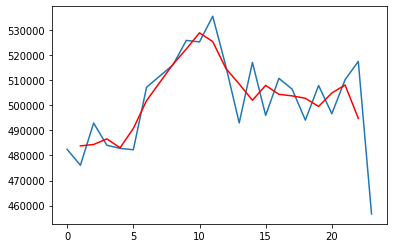

In [39]:
import matplotlib.pyplot as plt

plt.plot(chiffre_daffaire_ok["price"])
moyenne_mobile = chiffre_daffaire_ok.rolling(window = 3,center=True).mean().round(2)
plt.plot(moyenne_mobile["price"], color='red')
plt.show()

## <font color=B42633> **Décomposition en moyenne mobile : évaluation de la tendance globale** 

In [40]:
#utilisation de la fonction rolling
import numpy as np
def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w


print(moving_average(chiffre_daffaire['price'],4))

[483895.485  483994.1825 485538.055  489112.3575 448289.9025 456622.985
 467531.1075 472055.685  525748.875  525571.075  517341.49   515289.8925
 505401.0475 504232.695  507599.7775 501845.26   504820.6725 501291.1275
 502229.185  508085.69   495276.1875]


## <font color=B42633>**Les tops et les flops**

In [41]:
top = transaction_ok.loc[:, ['session_id','id_prod']].groupby(['id_prod']).count()

In [42]:
top.sort_values(by = 'session_id', ascending = False).head(3)

,session_id
id_prod,
1_369,2252
1_417,2189
1_414,2180


In [43]:
top.sort_values(by = 'session_id', ascending = True).head(3)

,session_id
id_prod,
0_549,1
0_2201,1
2_23,1


## <font color=B42633> **La répartition par catégorie** 

In [44]:
repartition_par_cat = transaction_produit.groupby(pd.Grouper(key='categ')).sum().reset_index()

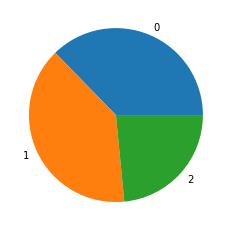

In [45]:

plt.pie(repartition_par_cat["price"], labels=repartition_par_cat["categ"]) 
plt.show() 

In [46]:
repartition_par_cat_f = transaction_produit.groupby(pd.Grouper(key='categ')).count().reset_index()

In [47]:
repartition_par_cat_f

,categ,id_prod,date,session_id,client_id,Calendrier,annee / mois,heure2,price
0,0,415459,415459,415459,415459,415459,415459,415459,415459
1,1,227169,227169,227169,227169,227169,227169,227169,227169
2,2,36483,36483,36483,36483,36483,36483,36483,36483


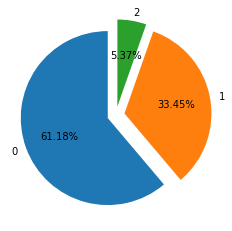

In [48]:


plt.pie(repartition_par_cat_f["price"], labels=repartition_par_cat["categ"], startangle=90, shadow=False,explode=(0.1, 0.1, 0.1), autopct='%1.2f%%') 

plt.show() 

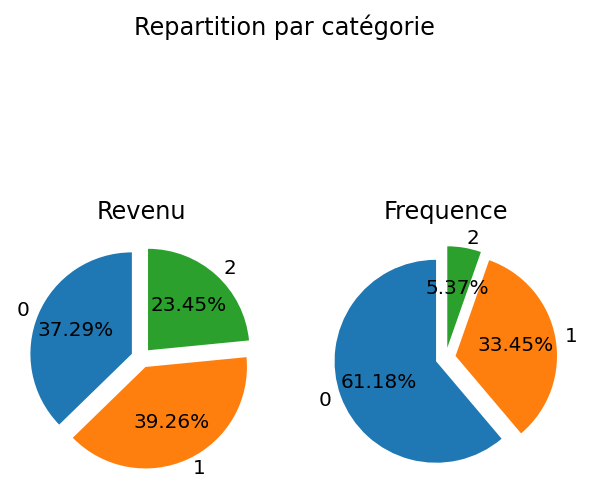

In [49]:
#colors = {'water': 'b', 'fire': 'r', 'stones': 'gray'}  # same color for each name in both pie
fig, axes = plt.subplots(1, 2, figsize=(5,5),dpi=144)
plt.suptitle("Repartition par catégorie")

for ax, df, title in zip(axes, (repartition_par_cat, repartition_par_cat_f), ('Revenu', 'Frequence')):
    count = df.price.to_frame().sort_index()
    ax.pie(count.price, labels=count.index, startangle=90, shadow=False,explode=(0.1, 0.1, 0.1), autopct='%1.2f%%')
    ax.set_title(title)

##  <font color=B42633> **Courbe de Lorenz : La répartition du chiffre d'affaires** 

In [50]:
repartition_par_client = transaction_produit.groupby(pd.Grouper(key='client_id')).sum().reset_index()

In [51]:
repartition_par_client[['client_id', 'price']].sort_values(by='price', ascending=False)

,client_id,price
29,c_1609,324033.35
411,c_4958,289760.34
32,c_6714,153598.92
45,c_3454,113637.93
1286,c_3263,5276.87
...,...,...
8594,c_4648,11.20
8528,c_240,11.06
1338,c_8114,9.98
8072,c_8140,8.30


In [52]:
client = repartition_par_client['price']
client

0       2288.49
1       1519.18
2       4102.18
3       2709.81
4       2418.01
         ...   
8595      13.36
8596     363.98
8597     363.98
8598      39.70
8599     201.98
Name: price, Length: 8600, dtype: float64

In [53]:
client = repartition_par_client['price']
list_client = list(repartition_par_client['price'])
n = len(client)
lorenz = np.cumsum(np.sort(client)) / client.sum()
lorenz = np.append([0],lorenz) # La courbe de Lorenz commence à 0


#plt.axes().axis('equal')
#xaxis = np.linspace(0-1/n,1+1/n,n+1) #Il y a un segment de taille n pour chaque individu, plus 1 segment supplémentaire d'ordonnée 0. Le premier segment commence à 0-1/n, et le dernier termine à 1+1/n.
#plt.plot(xaxis,lorenz,drawstyle='steps-post')

#plt.plot([0,1], [0,1], color='k')
#plt.show()

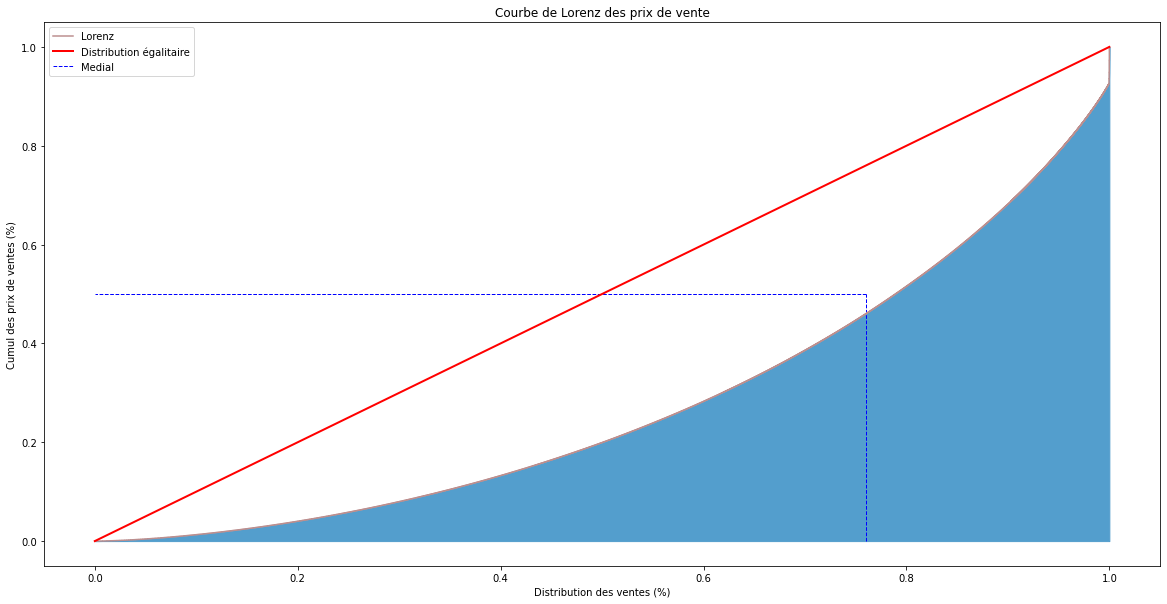

In [54]:
plt.figure(figsize=(20, 10))
plt.plot(np.linspace(0,1, len(lorenz)), lorenz, drawstyle='steps-post', color='rosybrown', label='Lorenz')
plt.fill_between(np.linspace(0,1,len(lorenz)),lorenz , color='#539ecd')
plt.plot([0, 1], [0, 1], 'r-', lw=2, label='Distribution égalitaire')
plt.vlines(x=.76, ymin=0, ymax=.5, color='blue', linestyle='--', linewidth=1, label='Medial')
plt.hlines(xmin=.76, xmax=0, y=.5, color='blue', linestyle='--', linewidth=1)
plt.title('Courbe de Lorenz des prix de vente')
plt.xlabel("Distribution des ventes (%)")
plt.ylabel("Cumul des prix de ventes (%)")
plt.legend(loc="best")
#figure(figsize=(10,10))
#plt.figure(figsize=(2, 2))
#plt.savefig("p4_graphic/lorenz_price.png")
plt.show()

In [55]:
#calcul l'indice de gini pour comfirmer conclusion

#Aire sous la courbe de Lorenz. La dernière valeur ne participe pas à l'aire, d'où "[:-1]"
#aire_ss_courbe_price = lorenz_price[:-1].sum()/len(lorenz_price) 
aire_ss_courbe_price = lorenz[:-1].sum()/len(lorenz) 
#Aire entre la 1e bissectrice et la courbe de Lorenz
S = 0.5 - aire_ss_courbe_price 
gini_price = round(2*S, 2)

print("L'indice de Gini est égal à {}".format(gini_price))


L'indice de Gini est égal à 0.45


## <font color=B42633> **Les tests de corrélation** 
___________________

In [56]:
client

0       2288.49
1       1519.18
2       4102.18
3       2709.81
4       2418.01
         ...   
8595      13.36
8596     363.98
8597     363.98
8598      39.70
8599     201.98
Name: price, Length: 8600, dtype: float64

In [58]:
client2 = pd.read_csv('/content/drive/MyDrive/Cours/OPEN CLASSROOM/P6_Ehouman_Yann/DAN-P6-donnees/customers.csv')

In [59]:
client = client2

In [60]:
client.sample()

,client_id,sex,birth
3783,c_270,m,1953


In [61]:
transaction_produit_client = pd.merge(transaction_produit, client, on='client_id')

In [63]:
transaction_produit_client.head()

,id_prod,date,session_id,client_id,Calendrier,annee / mois,heure2,price,categ,sex,birth
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,2022/05/20,2022/05,2022/05/20 13:21:29,4.18,0,f,1986
1,0_1518,2021-07-20 13:21:29.043970,s_64849,c_103,2021/07/20,2021/07,2021/07/20 13:21:29,4.18,0,f,1986
2,0_1518,2022-08-20 13:21:29.043970,s_255965,c_103,2022/08/20,2022/08,2022/08/20 13:21:29,4.18,0,f,1986
3,0_1418,2022-06-18 01:49:37.823274,s_225411,c_103,2022/06/18,2022/06,2022/06/18 01:49:37,8.57,0,f,1986
4,0_1418,2021-08-18 01:49:37.823274,s_77214,c_103,2021/08/18,2021/08,2021/08/18 01:49:37,8.57,0,f,1986


### Test de Chi2 : Corrélation sexe/categorie

In [64]:
import pandas as pd
from scipy.stats import chi2_contingency

table = pd.crosstab(transaction_produit_client['sex'],transaction_produit_client['categ'])

resultats_test = chi2_contingency(table)

print("statistique de test : ",resultats_test[0])
print("p_valeur :",resultats_test[1])
print("degré de liberté :",resultats_test[2])

statistique de test :  147.11906816131497
p_valeur : 1.1310980597090762e-32
degré de liberté : 2


### Test de Pearson : Corrélation age/fréquence d'achat

In [65]:
transaction_produit_client['age'] = 2022 - transaction_produit_client['birth']
transaction_produit_client['age']

0         36
1         36
2         36
3         36
4         36
          ..
679106    21
679107    62
679108    62
679109    30
679110    30
Name: age, Length: 679111, dtype: int64

In [66]:
repartition_par_age2 = transaction_produit_client.groupby(pd.Grouper(key='age')).count().reset_index()
repartition_par_age2

,age,id_prod,date,session_id,client_id,Calendrier,annee / mois,heure2,price,categ,sex,birth
0,36,23465,23465,23465,23465,23465,23465,23465,23465,23465,23465,23465
1,37,14637,14637,14637,14637,14637,14637,14637,14637,14637,14637,14637
2,48,19451,19451,19451,19451,19451,19451,19451,19451,19451,19451,19451
3,60,6132,6132,6132,6132,6132,6132,6132,6132,6132,6132,6132
4,46,17266,17266,17266,17266,17266,17266,17266,17266,17266,17266,17266
...,...,...,...,...,...,...,...,...,...,...,...,...
71,90,311,311,311,311,311,311,311,311,311,311,311
72,93,201,201,201,201,201,201,201,201,201,201,201
73,91,170,170,170,170,170,170,170,170,170,170,170
74,89,326,326,326,326,326,326,326,326,326,326,326


In [67]:
from scipy.stats import pearsonr

pd.DataFrame(pearsonr(repartition_par_age2['age'],repartition_par_age2['session_id']),
             index = ['pearson_coeff','p-value'],
             columns = ['resultat_test'])

,resultat_test
pearson_coeff,-5.337344e-01
p-value,6.876677e-07


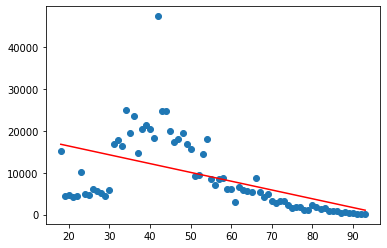

In [68]:
x1 = repartition_par_age2['age']
y1 = repartition_par_age2['session_id']

plt.scatter(x1, y1) 
  
plt.plot(np.unique(x1), np.poly1d(np.polyfit(x1, y1, 1)) 
         (np.unique(x1)), color='red') 

### Test de Pearson : Corrélation age/taille du panier moyen

In [69]:
repartition_par_age_client = transaction_produit_client.groupby(['age']).count()
repartition_par_age_client

,id_prod,date,session_id,client_id,Calendrier,annee / mois,heure2,price,categ,sex,birth
age,,,,,,,,,,,
18,15149,15149,15149,15149,15149,15149,15149,15149,15149,15149,15149
19,4371,4371,4371,4371,4371,4371,4371,4371,4371,4371,4371
20,4584,4584,4584,4584,4584,4584,4584,4584,4584,4584,4584
21,4252,4252,4252,4252,4252,4252,4252,4252,4252,4252,4252
22,4413,4413,4413,4413,4413,4413,4413,4413,4413,4413,4413
...,...,...,...,...,...,...,...,...,...,...,...
89,326,326,326,326,326,326,326,326,326,326,326
90,311,311,311,311,311,311,311,311,311,311,311
91,170,170,170,170,170,170,170,170,170,170,170


In [70]:
repartition_par_age_client = transaction_produit_client.groupby(['age', 'session_id']).count()

#repartition_par_age_client = transaction_produit_client.groupby(pd.Grouper(key='age','client_id')).sum().reset_index()
repartition_par_age_client = repartition_par_age_client.groupby('age').mean().reset_index()

#repartition_par_age_client = df_vente.groupby(['age', 'session_id']).count().reset_index()
#repartition_par_age_client = repartition_par_age_client[['age', 'id_prod']]
repartition_par_age_client
#1er temps: on regroupe par achat et par age / ensuite on fait une moyenne du nombre d'achat par session
#panier_client = panier_client.groupby('age').mean().reset_index()

,age,id_prod,date,client_id,Calendrier,annee / mois,heure2,price,categ,sex,birth
0,18,1.762741,1.762741,1.762741,1.762741,1.762741,1.762741,1.762741,1.762741,1.762741,1.762741
1,19,1.702766,1.702766,1.702766,1.702766,1.702766,1.702766,1.702766,1.702766,1.702766,1.702766
2,20,1.760369,1.760369,1.760369,1.760369,1.760369,1.760369,1.760369,1.760369,1.760369,1.760369
3,21,1.749074,1.749074,1.749074,1.749074,1.749074,1.749074,1.749074,1.749074,1.749074,1.749074
4,22,1.822800,1.822800,1.822800,1.822800,1.822800,1.822800,1.822800,1.822800,1.822800,1.822800
...,...,...,...,...,...,...,...,...,...,...,...
71,89,1.399142,1.399142,1.399142,1.399142,1.399142,1.399142,1.399142,1.399142,1.399142,1.399142
72,90,1.509709,1.509709,1.509709,1.509709,1.509709,1.509709,1.509709,1.509709,1.509709,1.509709
73,91,1.770833,1.770833,1.770833,1.770833,1.770833,1.770833,1.770833,1.770833,1.770833,1.770833
74,92,1.547945,1.547945,1.547945,1.547945,1.547945,1.547945,1.547945,1.547945,1.547945,1.547945


In [71]:
from scipy.stats import pearsonr

pd.DataFrame(pearsonr(repartition_par_age_client['age'],repartition_par_age_client['id_prod']),
             index = ['pearson_coeff','p-value'],
             columns = ['resultat_test'])

,resultat_test
pearson_coeff,-5.739035e-01
p-value,5.970919e-08


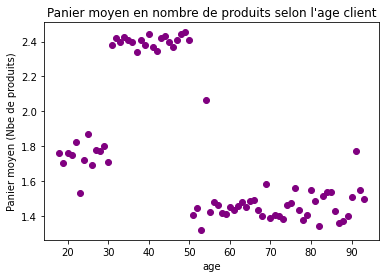

In [72]:
plt.plot(repartition_par_age_client['age'], repartition_par_age_client['id_prod'], 'o', color='purple')

plt.xlabel('age')
plt.ylabel('Panier moyen (Nbe de produits)')
plt.title('Panier moyen en nombre de produits selon l\'age client')


plt.show()


### Test d'Anova : Corrélation age/categorie 

In [73]:
#repartition_par_age_cat = transaction_produit_client.groupby(['age', 'categ']).sum().reset_index()
#repartition_par_age_cat
repartition_par_age_cat = pd.crosstab(transaction_produit_client['age'], transaction_produit_client['categ'])
repartition_par_age_cat.head()


categ,0,1,2
age,,,
18,3418,5719,6012
19,909,1678,1784
20,1016,1723,1845
21,974,1550,1728
22,1114,1628,1671


In [74]:
repartition_par_age_cat = transaction_produit_client.groupby(['age', 'categ']).count().reset_index()
repartition_par_age_cat = repartition_par_age_cat[['age', 'categ', 'session_id']]
repartition_par_age_cat.head()


,age,categ,session_id
0,18,0,3418
1,18,1,5719
2,18,2,6012
3,19,0,909
4,19,1,1678


In [75]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
model = ols('age ~ categ', data=repartition_par_age_cat).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
categ,1.695548e-27,1.0,3.492310e-30,1.0
Residual,1.097250e+05,226.0,NaN,NaN


### Test de Chi 2 : Corrélation age/montant d'achat 

In [76]:
from scipy.stats import pearsonr

pd.DataFrame(pearsonr(repartition_par_age2['age'],repartition_par_age2['price']),
             index = ['pearson_coeff','p-value'],
             columns = ['resultat_test'])

,resultat_test
pearson_coeff,-5.337344e-01
p-value,6.876677e-07


In [77]:
x = repartition_par_age2['age']
y = repartition_par_age2['price']

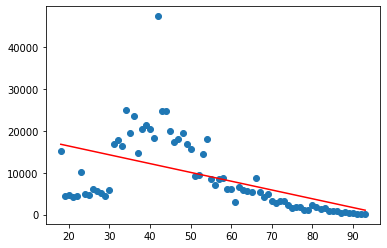

In [78]:
plt.scatter(x, y) 
  
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1)) 
         (np.unique(x)), color='red') 